# Ways to produce histograms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.filters as flt

import sys
#update the following line to the downloaded software location
sys.path.append('/Users/kaestner/git/scripts/python/amglib')

import amglib.readers as io


ModuleNotFoundError: No module named 'amglib'

## Read data
Usually, you have two images to compare. This reader loads two stacks of tiff images.

In [ ]:
x = io.readImages('path/slice_{0:04}.tif', first=0, last=100)

In [ ]:
n = io.readImages('path/slice_{0:04}.tif', first=0, last=100)

# Test data
These are test images I used to develop the notebook. Skip this section if you have real data.

In [112]:
x = plt.imread('frog.png').mean(axis=2) 
n = plt.imread('duck.png').mean(axis=2)

In [113]:
x = x + np.random.normal( loc=0, scale=0.05, size=x.shape)
n = n + np.random.normal( loc=0, scale=0.1, size=n.shape)

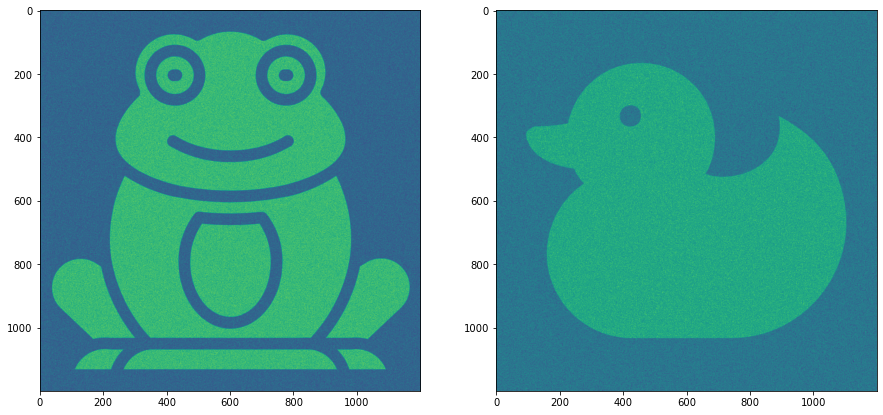

In [114]:
fig, ax = plt.subplots(1,2, figsize=(15,7))

ax[0].imshow(x);
ax[1].imshow(n);

## Make histogram
Here, we create the different histograms. 
- One bivariate 
- One 1D histogram for neutrons
- One 1D histogram for X-rays

In [156]:
nBins = 100 # Here, we select the number of bins in the histograms.
H, xedges, nedges = np.histogram2d(x.ravel(), n.ravel(), bins=nBins)
nH,nax = np.histogram(n.ravel(),bins=nedges)
xH,xax= np.histogram(x.ravel(),bins=xedges)

Sometimes, there is too little data for the chosen number of bins. Then either you have to reduce the number of bins or you can also use a median filter to smooth the histogram.

In [158]:
H = flt.median(H,np.ones([3,3]))

# Show 2D histograms
The bivariate histogram is a 2D matrix. It can thus be shown as an image. Important here is to add a color bar to indicate what counts the color map corresponds to.

## Plain histogram
The first display the data as it is.

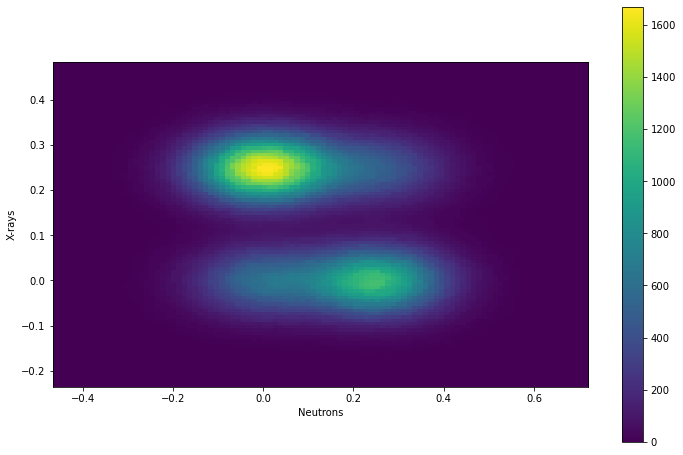

In [165]:
fig, ax= plt.subplots(1,1, figsize=(12,8))
cax= ax.imshow(H,extent = [nedges.min(),nedges.max(),xedges.min(),xedges.max() ]);
ax.set_ylabel('X-rays')
ax.set_xlabel('Neutrons')
fig.colorbar(cax);

## Logarithm of the histogram
Often, there is a class unbalance in the data. The logarithm is a trick to emphasize the under represented data. Observe here that the colorbar now has a logarithmic scale.

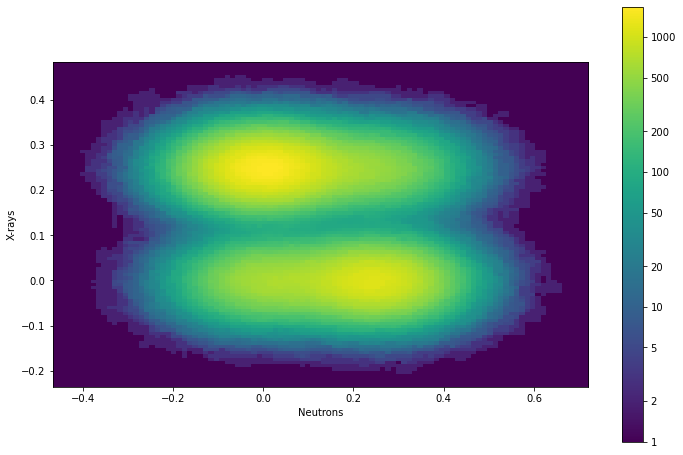

In [167]:
fig, ax= plt.subplots(1,1, figsize=(12,8))
cax  = plt.imshow(np.log(H+1),extent = [nedges.min(),nedges.max(),xedges.min(),xedges.max() ])
ticks = np.array([1,2,5,10,20,50,100, 200,500, 1000])
cbar = fig.colorbar(cax, ticks=np.log(ticks))
cbar.ax.set_yticklabels(ticks) ;
ax.set_ylabel('X-rays');
ax.set_xlabel('Neutrons');

## Show surface plot histograms
Surface plots of the histogram is more eye-candy suited for publications and presentations. It is often harder to make decisions from them.

### First version
This version takes the histogram as it is. I have also plotted the histograms for each modality along the "walls" of the coordinate system.

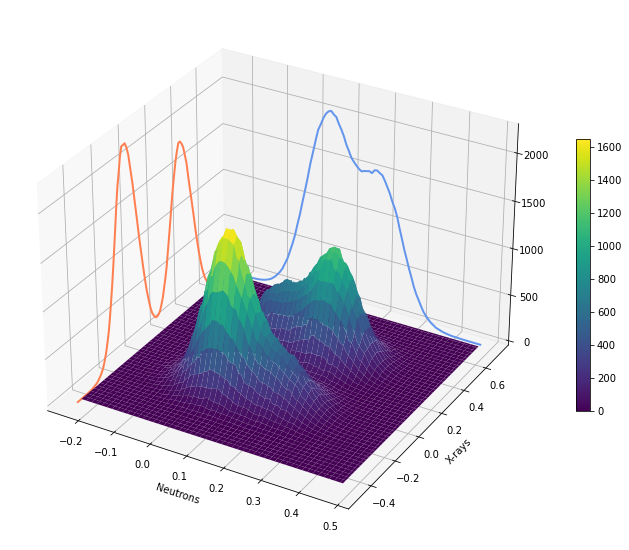

In [161]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(xedges[:-1], nedges[:-1])

fig = plt.figure(figsize=(12,10))

ax = fig.gca(projection = '3d')
#ax.set_zlim3d(0, 3)
hScale = 0.05
ax.plot(yedges[:-1], hScale*xH, zs=xedges.min(), zdir='x', lw = 2., color = 'coral')
ax.plot(xedges[:-1], hScale*nH, zs=yedges.max(), zdir='y', lw = 2., color = 'cornflowerblue')
cax=ax.plot_surface(X, Y, H, cmap='viridis')
fig.colorbar(cax,shrink=0.5)
ax.set_ylabel('X-rays');
ax.set_xlabel('Neutrons');
plt.show()

### Logarithmic version
Also here, I have a version with the logarithm of the histogram.

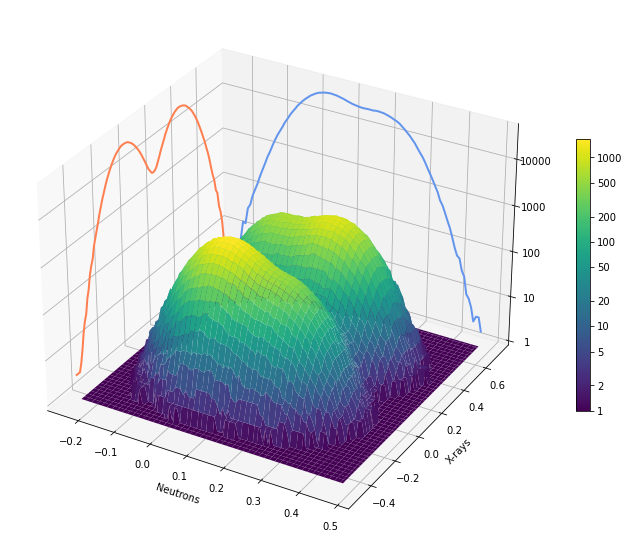

In [171]:
X, Y = np.meshgrid(xedges[:-1], nedges[:-1])

fig = plt.figure(figsize=(12,10))

ax = fig.gca(projection = '3d')
#ax.set_zlim3d(0, 3)
hScale = 1
ax.plot(yedges[:-1], hScale*np.log(xH+1), zs=xedges.min(), zdir='x', lw = 2., color = 'coral')
ax.plot(xedges[:-1], hScale*np.log(nH+1), zs=yedges.max(), zdir='y', lw = 2., color = 'cornflowerblue')
cax=ax.plot_surface(X, Y, np.log(H+1), cmap='viridis')
zticks = np.array([1,10,100,1000,10000]);
ax.set_zticks(np.log(zticks))
ax.set_zticklabels(zticks)
ticks = np.array([1,2,5,10,20,50,100, 200,500, 1000])
cbar = fig.colorbar(cax, ticks=np.log(ticks),shrink=0.5)
cbar.ax.set_yticklabels(ticks) ;
ax.set_ylabel('X-rays');
ax.set_xlabel('Neutrons');
plt.show()

## Colors
This example is made using the default 'viridis' colormap. This can of course be changed. Also the line plot colors can be easily modified.